In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
import itertools
import statsmodels.api as sm

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('MMM_data.csv')
df.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,1/1/10,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,1/2/10,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,TV Manufacturing & Supplier Unit,1/3/10,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,TV Manufacturing & Supplier Unit,1/4/10,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,TV Manufacturing & Supplier Unit,1/5/10,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909


In [3]:
df.describe()

,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2.613000e+03,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000
mean,5021.434367,102.609989,103.152315,102.238232,363.275128,4522.970915,1.641507e+06,60.388495,12.651179,88.074643,1324.501468,3079.184067,505.296876,30.618203,139.437260,286.228665,1146.114128
std,2681.197808,1.381355,3.167221,2.037774,26.372958,2603.996535,9.416673e+05,13.557190,1.117926,12.569956,123.677327,1520.891014,488.147782,31.570754,146.042432,138.406620,822.991163
min,1610.000000,101.300000,96.300000,99.500000,282.140000,1510.000000,4.627096e+05,37.916700,10.027128,62.968800,1067.155700,0.000000,5.659000,0.000000,66.863600,191.181800,697.636400
25%,2436.000000,101.400000,102.700000,100.400000,361.600000,1776.000000,6.717679e+05,47.554100,11.885714,78.098100,1251.250000,2226.429000,114.957000,0.000000,95.136400,234.954500,849.545500
50%,4636.000000,102.300000,103.600000,102.700000,361.620000,4412.000000,1.605095e+06,61.267900,13.186582,84.129200,1380.696200,3302.667000,221.528000,26.119600,109.636400,261.454500,928.545500
75%,6834.000000,103.400000,104.600000,103.500000,361.620000,6266.000000,2.267206e+06,71.012200,13.437482,98.639000,1416.171400,4237.095000,854.310000,46.782000,126.045500,291.318200,1114.863600
max,18565.000000,106.500000,107.900000,107.200000,400.100000,16482.000000,5.960221e+06,89.728300,14.104193,118.467700,1479.456500,6354.571000,1791.183000,144.995100,1169.409100,1540.429400,7307.318200


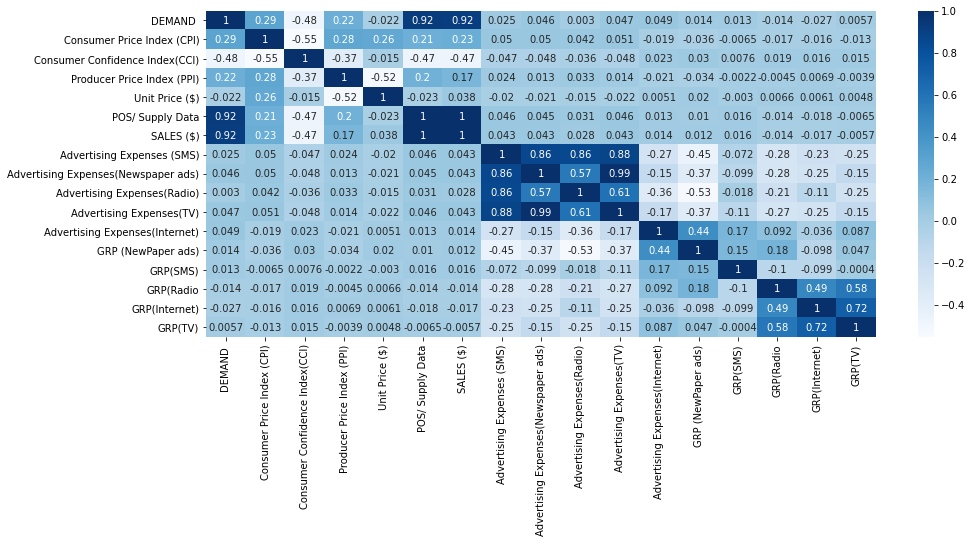

In [4]:
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

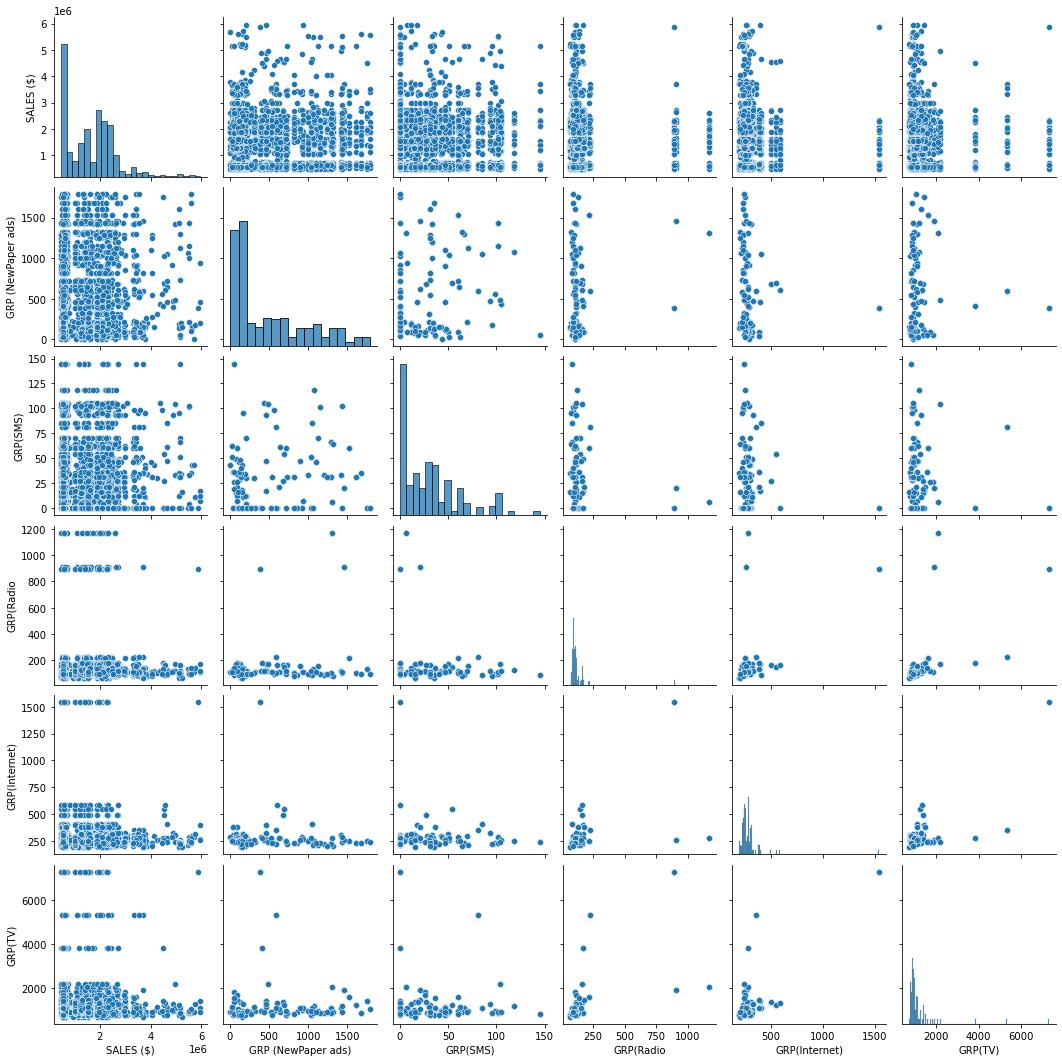

In [5]:
# So it looks like advertising is only very very loosely correlated with sales – roughly between 1 and 5 percent...
# And even negative, which seems totally ridiculous. Let's take a look at some GRP/Sales pair plots, but also some plots
# over time to try and identify if advertising may be having a lingering effect via brand building

subset = ['SALES ($)', 'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio', 'GRP(Internet)', 'GRP(TV)']
sns.pairplot(df[subset])

# From the pair plot it looks like there is sweet fa in terms of correlation between anything...

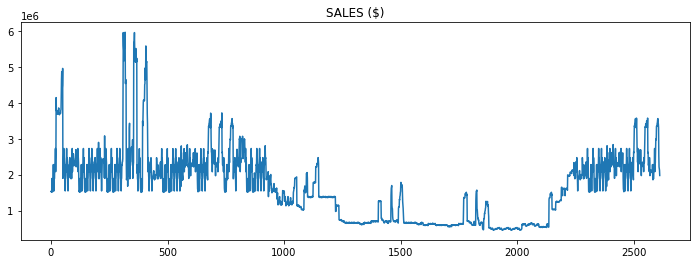

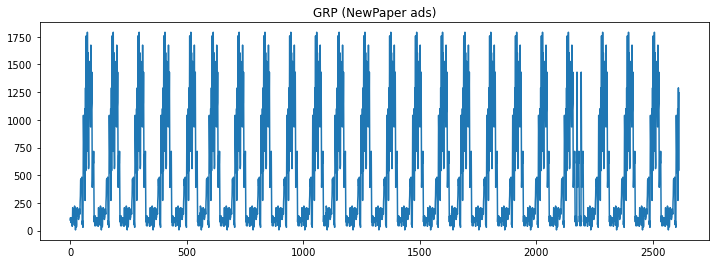

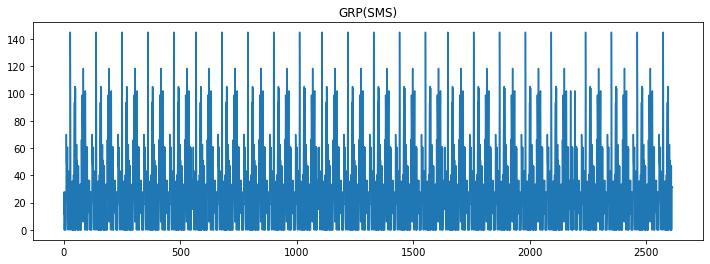

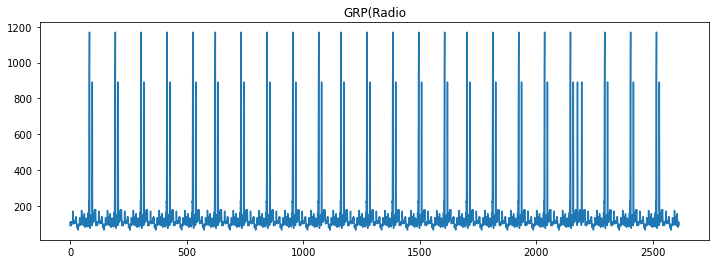

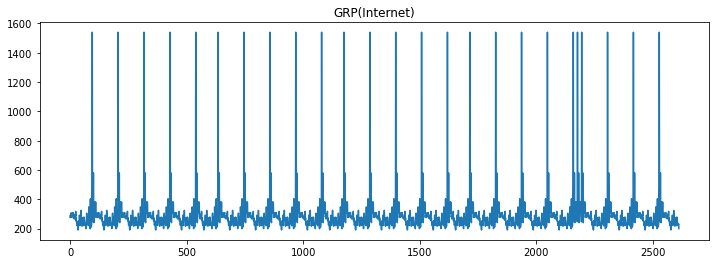

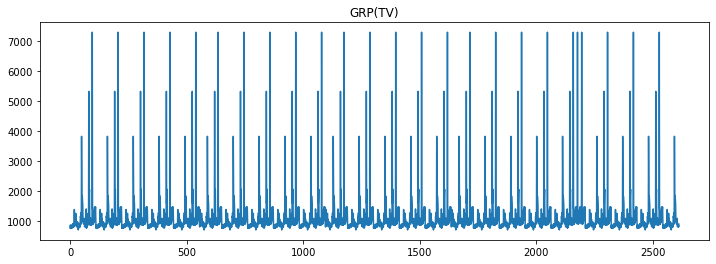

In [6]:
for sub in subset:
    y = df[sub]
    fig, ax = plt.subplots(figsize = (12, 4))
    plt.plot(y - min(y)/(max(y)-min(y)))
    ax.set_title(sub)

In [7]:
# We're going to need to have a fiddle with the dates, to format them as datetimes rather than simply objects
from datetime import datetime

df['datetime'] = pd.to_datetime(df['DATE'])
df.head()

# Turns out that was very easy. But let's just check it's worked

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV),datetime
0,TV Manufacturing & Supplier Unit,1/1/10,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909,2010-01-01
1,TV Manufacturing & Supplier Unit,1/2/10,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364,2010-01-02
2,TV Manufacturing & Supplier Unit,1/3/10,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545,2010-01-03
3,TV Manufacturing & Supplier Unit,1/4/10,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545,2010-01-04
4,TV Manufacturing & Supplier Unit,1/5/10,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909,2010-01-05


# SALES TIME SERIES

Text(0.5, 1.0, 'Daily sales')

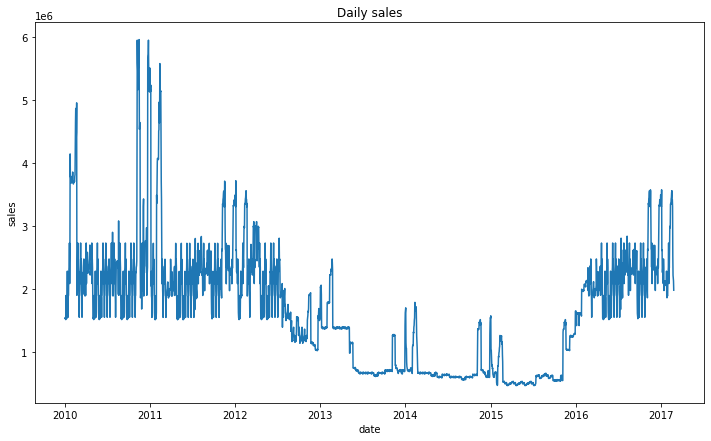

In [8]:
# Let's follow the process in the time series tutorial with the output variable – sales, to try and get a sense of
# whether there are any underlying trends

# Make sales dataframe
sales = df[['datetime', 'SALES ($)']]
sales = sales.rename(columns={'datetime': 'date', 'SALES ($)':'sales'})

fig, ax = plt.subplots(figsize=(12,7))
# plt.plot(sales['SALES ($)'])

sns.lineplot(data=sales, x='date', y='sales')
ax.set_title('Daily sales')


In [9]:
# Reindex by date
sales = sales.set_index('date')
sales.head()

,sales
date,
2010-01-01,1533268.80
2010-01-02,1542670.92
2010-01-03,1520973.72
2010-01-04,1510125.12
2010-01-05,1892719.08


In [33]:
# Resample for average daily sales by month
y = sales['sales'].resample('M').mean()
y.head()

date
2010-01-31    2.448611e+06
2010-02-28    3.550618e+06
2010-03-31    2.119781e+06
2010-04-30    2.352326e+06
2010-05-31    1.853687e+06
Freq: M, Name: sales, dtype: float64

Text(0.5, 1.0, 'Moving monthly average of daily sales')

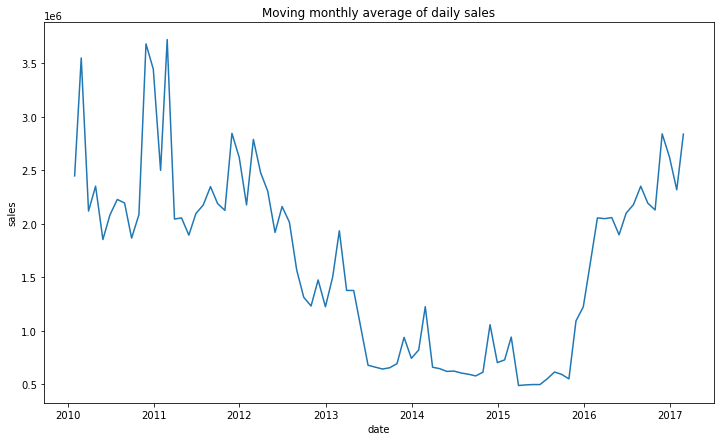

In [34]:
# Let's have a look at the smoothed data

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=y)
ax.set_title('Moving monthly average of daily sales')

# NAIVE SEASONAL DECOMPOSITION

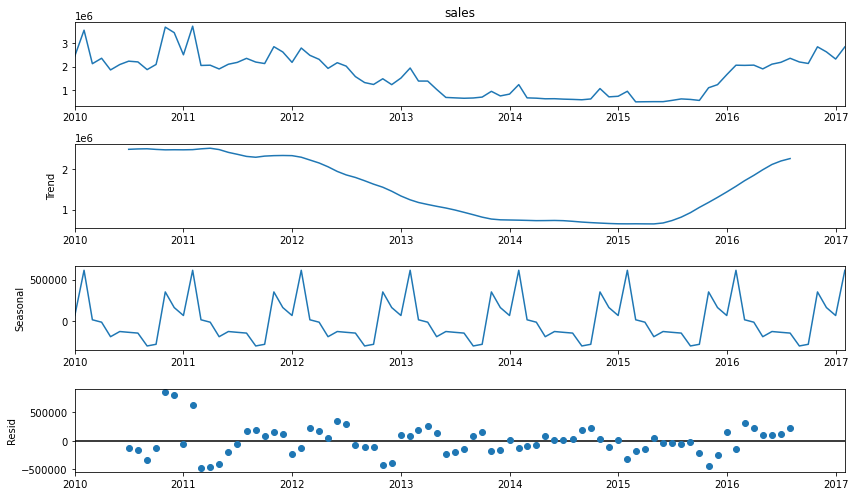

In [12]:
# Run seasonal decomposition from stats models to naively decompose observations into a trend and seasonal patterns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# An interesting breakdown. Looks like there was a considerable drop in sales over the period 2012-2014, where they 
# plateaud and remained for about a year and a half, before building back up from mid 2015 to more or less regain the 
# previous levels of 2010-2011 by mid 2016. Clear seasonality, with main peak in January and another in Oct/Nov.

# ARIMA

In [13]:
# To be able to use ARIMA, the data shoud be stationary, which from the above plots, we can see that it probably isn't
# We'll use a function borrowed from kaggle to check for sure

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)


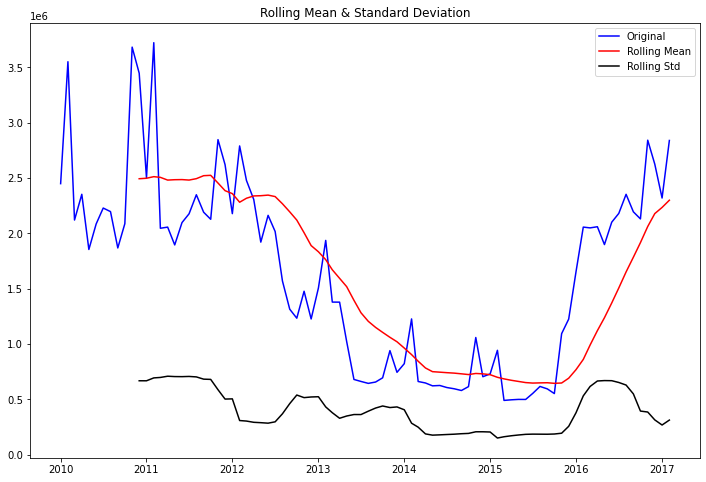

Results of Dickey-Fuller Test:
p-value = 0.4499. The series is likely non-stationary.
Test Statistic                 -1.663760
p-value                         0.449874
#Lags Used                     16.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [27]:
# Test our data
test_stationarity(y)
# We see that the data is likely not stationary – when we look at the plot, there definitely appears to be some
# kind of downwards, then upwards trend

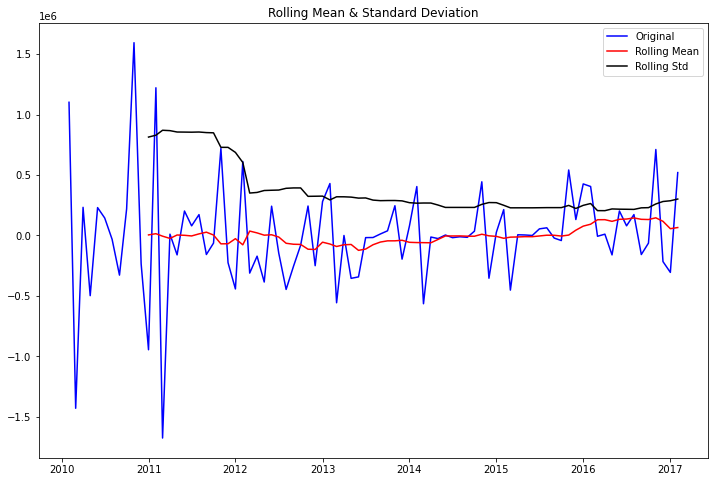

Results of Dickey-Fuller Test:
p-value = 0.6443. The series is likely non-stationary.
Test Statistic                 -1.266687
p-value                         0.644272
#Lags Used                     14.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


In [28]:
# First order difference the data and test it
first_diff = y - y.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)
# It still doesn't seem to be stationary after one diff, so we have to go again

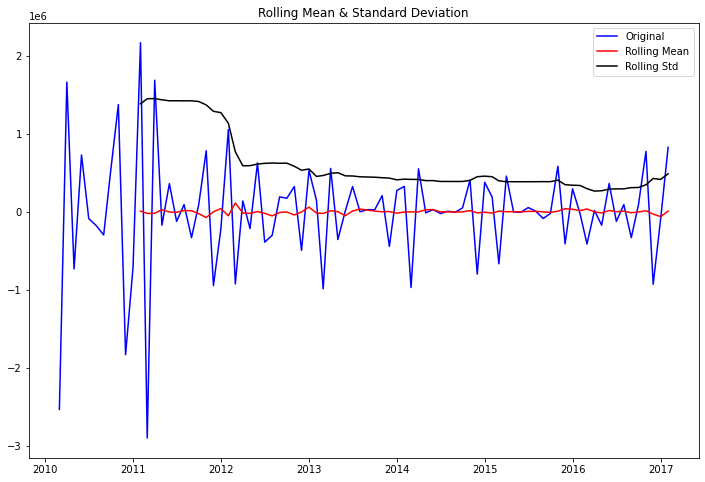

Results of Dickey-Fuller Test:
p-value = 0.0043. The series is likely stationary.
Test Statistic                 -3.689071
p-value                         0.004270
#Lags Used                     14.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


In [35]:
# This time the data has been made stationary
second_diff = first_diff - first_diff.shift(1)
second_diff = second_diff.dropna(inplace = False)
test_stationarity(second_diff, window = 12)

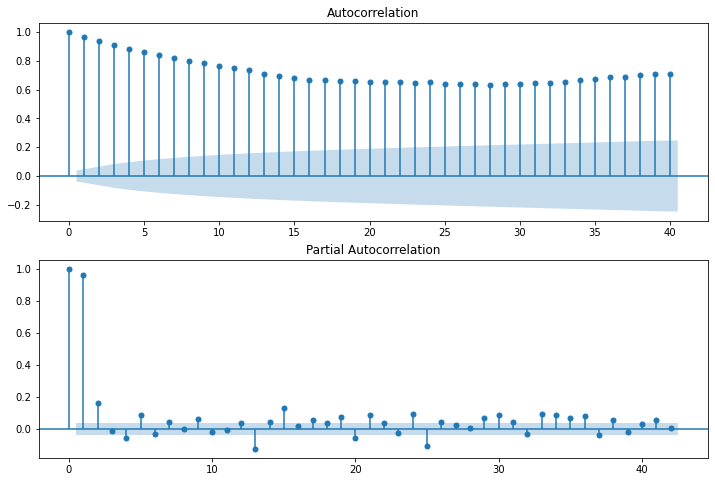

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales, lags=42, ax=ax2)
# Seriously high autocorrelation. Suggesting we do indeed need some kind of differencing

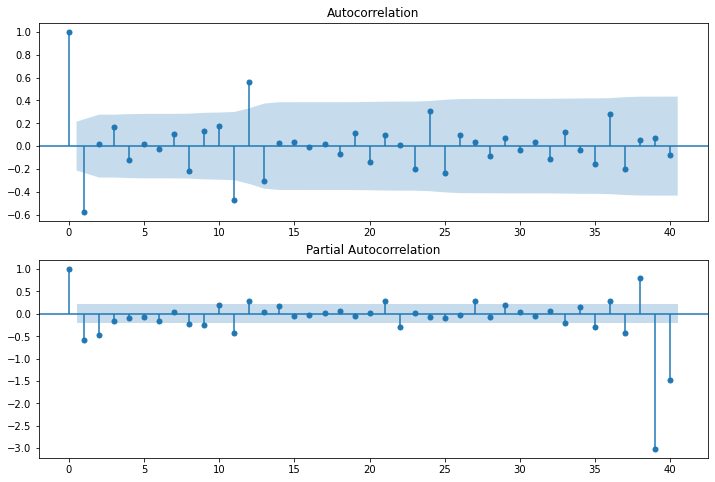

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(second_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(second_diff, lags=40, ax=ax2)
# Once we've done the second diff, autocorrelation looks a lot better. But still showing some periodic autocorrelation

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   86
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1254.127
Date:                Tue, 16 Nov 2021   AIC                           2510.254
Time:                        14:40:53   BIC                           2512.685
Sample:                    01-31-2010   HQIC                          2511.232
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.312e+11   4.63e+10     11.478      0.000    4.41e+11    6.22e+11
Ljung-Box (L1) (Q):                  28.63   Jarque-Bera (JB):                62.76
Prob(Q):                              0.00   Pr

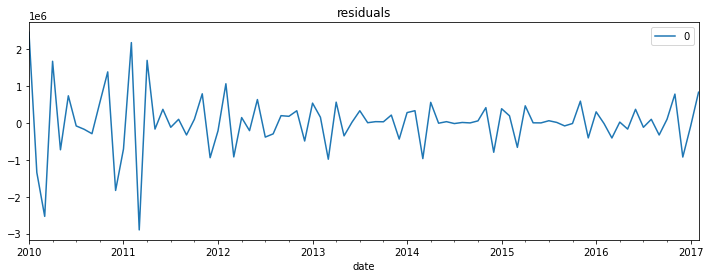

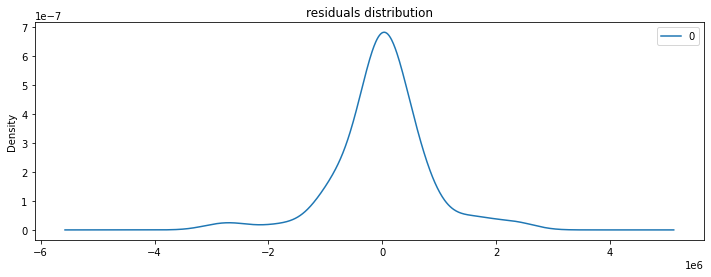

                  0
count  8.600000e+01
mean   6.047447e+03
std    7.933010e+05
min   -2.899407e+06
25%   -2.997332e+05
50%    1.039936e+04
75%    3.258977e+05
max    2.448611e+06


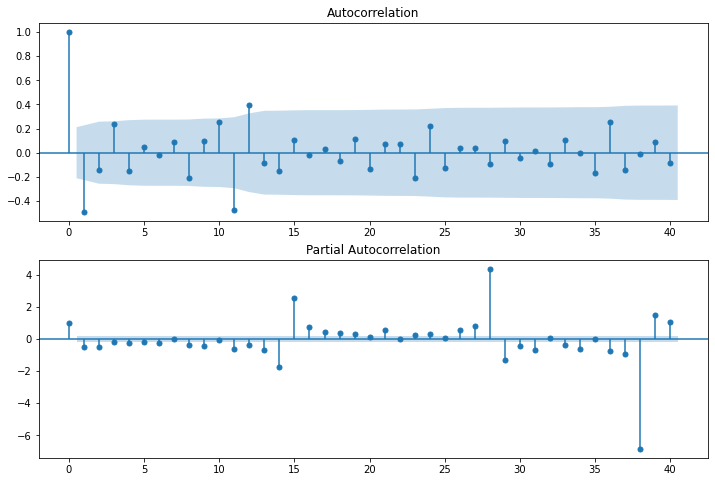

In [45]:
# So let's first fit an ARIMA model with parameters 0, 1, 0, before moving on to a grid search to see what the best
# values are for p, d and q.

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order=(0,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='residuals', figsize=(12, 4))
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='residuals distribution', figsize=(12, 4))
plt.show()
# summary stats of residuals
print(residuals.describe())

# Look at the ACF and PACF as well
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)

In [50]:
# Grid search for values of p, d & q minimising AIC.

p = d = q = range(0, 2, 1)
pdq = list(itertools.product(p, d, q))
print(pdq)
# Look for the model with the lowest AIC
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, results.aic))
    except:
        continue

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


# SARIMAX

In [43]:
# Now let's try a SARIMAX model. Firstly we check we know how to use the model, so set season_order = None.
# We know the seasonality is 12, for 12 months, then we'll do some kind of grid search for P, D & Q.

P = D = Q = range(0, 2)
PDQ = list(itertools.product(P, D, Q))
seasonal_PDQ = [(x[0], x[1], x[2], 12) for x in PDQ]
seasonal_PDQ

# Check things are as they seem
print('Parameter Combos:')
print(seasonal_PDQ)
print('Results: ')

# Look for the model with the lowest AIC
for param_seasonal in seasonal_PDQ:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=(0, 1, 0),
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('SARIMAX{}x{}12 - AIC:{}'.format((0, 1, 0), param_seasonal, results.aic))
    except:
        continue

# We find that the model with the lowest AIC of these parameter combos is:  
# SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1646.9683523818169

# SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1647.6622389513127

# This one was really close too, so perhaps we should check the residuals and see which one better accounts for the 
# autocorrelation

Parameter Combos:
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Results: 
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2422.746541131876
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2003.397136936619
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2034.2904934501012
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1646.9683523818169
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2026.7164501156105
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2002.941820767151
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1720.0837327867464
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1647.6622389513127


                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                   86
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -820.831
Date:                              Tue, 16 Nov 2021   AIC                           1647.662
Time:                                      14:19:08   BIC                           1653.945
Sample:                                  01-01-2010   HQIC                          1650.120
                                       - 02-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1326      0.080     -1.666      0.096      -0.289       0.023
ma.S.L12      -0.69

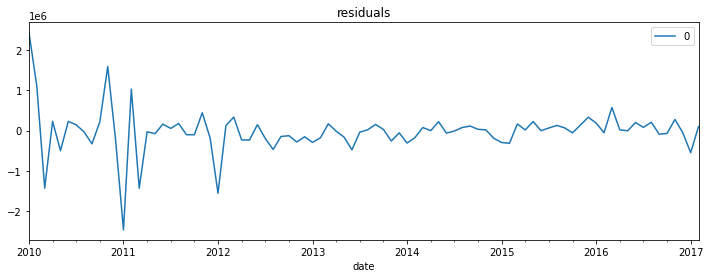

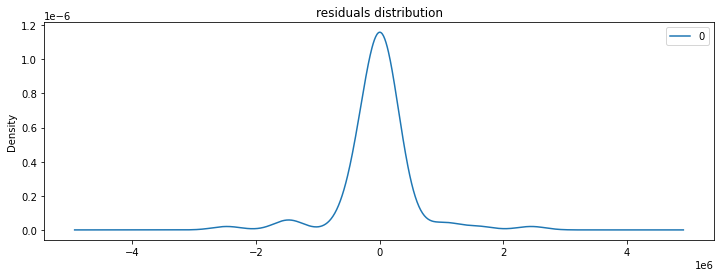

                  0
count  8.600000e+01
mean  -2.125017e+04
std    5.635783e+05
min   -2.470521e+06
25%   -1.760801e+05
50%   -1.946806e+03
75%    1.523767e+05
max    2.448611e+06


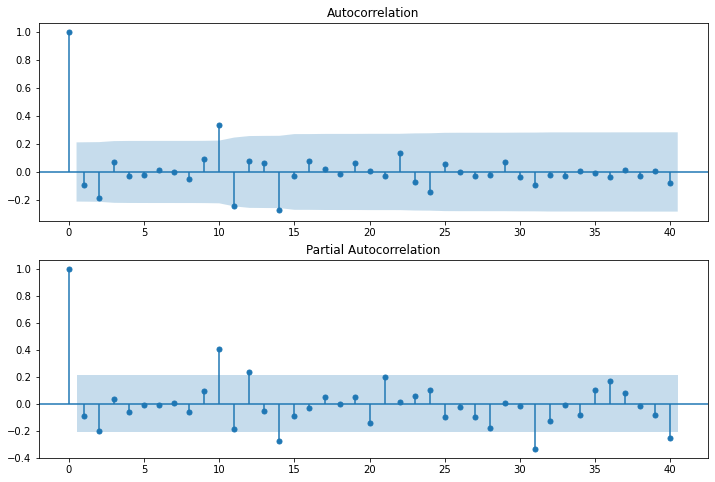

In [20]:
mod_s = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_s_fit = mod_s.fit()
# summary of fit model
print(model_s_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_s_fit.resid)
residuals.plot(title='residuals', figsize=(12, 4))
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='residuals distribution', figsize=(12, 4))
plt.show()
# summary stats of residuals
print(residuals.describe())

# Look at the ACF and PACF as well
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)

# We still appear to have some kind of seasonal effect going on, so perhaps need to increase the order of some of the
# parameters. Let's try the grid search with 0 and 2 instead of 0 and 1.

In [21]:
# Try upping P, D, Q to 0, 2 & 4:

P = D = Q = range(0, 5, 2)
PDQ = list(itertools.product(P, D, Q))
seasonal_PDQ = [(x[0], x[1], x[2], 12) for x in PDQ]
seasonal_PDQ

# Check things are as they seem
print('Parameter Combos:')
print(seasonal_PDQ)
print('Results: ')

# Look for the model with the lowest AIC
for param_seasonal in seasonal_PDQ:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=(0, 1, 0),
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('SARIMAX{}x{}12 - AIC:{}'.format((0, 1, 0), param_seasonal, results.aic))
    except:
        continue

Parameter Combos:
[(0, 0, 0, 12), (0, 0, 2, 12), (0, 0, 4, 12), (0, 2, 0, 12), (0, 2, 2, 12), (0, 2, 4, 12), (0, 4, 0, 12), (0, 4, 2, 12), (0, 4, 4, 12), (2, 0, 0, 12), (2, 0, 2, 12), (2, 0, 4, 12), (2, 2, 0, 12), (2, 2, 2, 12), (2, 2, 4, 12), (2, 4, 0, 12), (2, 4, 2, 12), (2, 4, 4, 12), (4, 0, 0, 12), (4, 0, 2, 12), (4, 0, 4, 12), (4, 2, 0, 12), (4, 2, 2, 12), (4, 2, 4, 12), (4, 4, 0, 12), (4, 4, 2, 12), (4, 4, 4, 12)]
Results: 
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2422.746541131876
SARIMAX(0, 1, 0)x(0, 0, 2, 12)12 - AIC:5487.972884865851
SARIMAX(0, 1, 0)x(0, 0, 4, 12)12 - AIC:1018.9643841303855
SARIMAX(0, 1, 0)x(0, 2, 0, 12)12 - AIC:1748.5891682800254
SARIMAX(0, 1, 0)x(0, 2, 2, 12)12 - AIC:1022.9751443058162
SARIMAX(0, 1, 0)x(0, 2, 4, 12)12 - AIC:347.7175173657857
SARIMAX(0, 1, 0)x(0, 4, 0, 12)12 - AIC:260447.59306783683
SARIMAX(0, 1, 0)x(0, 4, 2, 12)12 - AIC:5282.920825759221
SARIMAX(0, 1, 0)x(0, 4, 4, 12)12 - AIC:10.0
SARIMAX(0, 1, 0)x(2, 0, 0, 12)12 - AIC:1680.2384357928952
SARI

                                           SARIMAX Results                                           
Dep. Variable:                                         sales   No. Observations:                   86
Model:             SARIMAX(0, 1, 0)x(0, 2, [1, 2, 3, 4], 12)   Log Likelihood                -168.859
Date:                                       Tue, 16 Nov 2021   AIC                            347.718
Time:                                               14:19:49   BIC                            350.142
Sample:                                           01-01-2010   HQIC                           346.820
                                                - 02-01-2017                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8070     

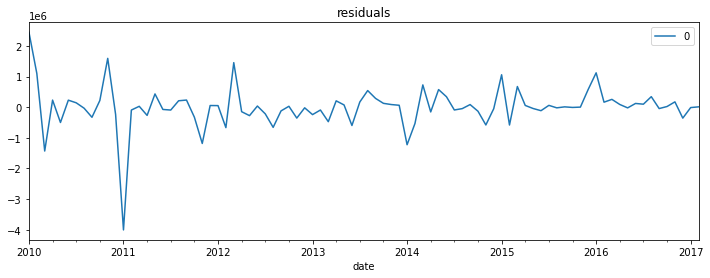

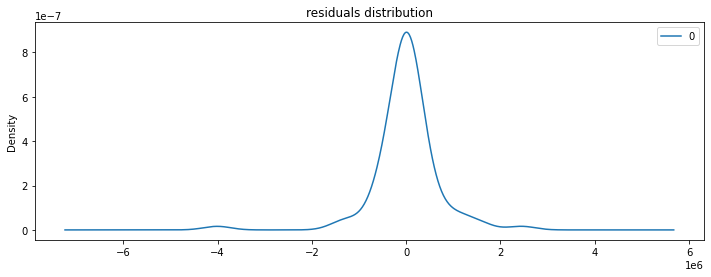

                  0
count  8.600000e+01
mean   2.864409e+03
std    7.018293e+05
min   -4.007091e+06
25%   -1.518530e+05
50%    1.201178e+04
75%    1.999619e+05
max    2.448611e+06


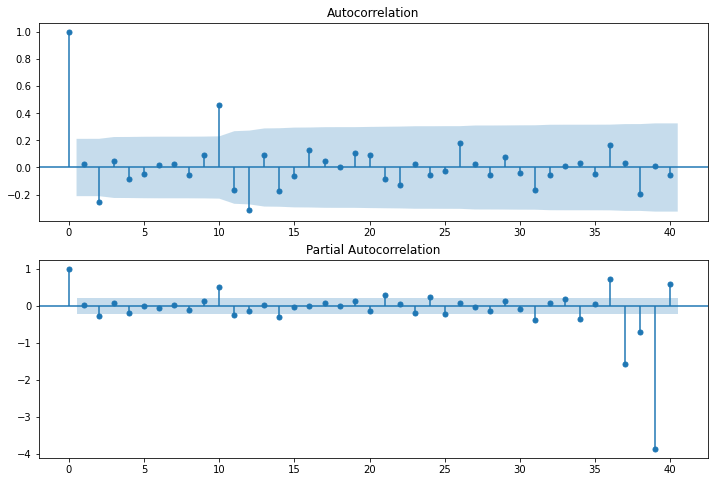

In [22]:
# Try upping P, D, Q to 0, 2 or 4:

mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(0, 1, 0),
                                seasonal_order=(0, 2, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

# line plot of residuals
residuals = pd.DataFrame(results.resid)
residuals.plot(title='residuals', figsize=(12, 4))
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='residuals distribution', figsize=(12, 4))
plt.show()
# summary stats of residuals
print(residuals.describe())

# Look at the ACF and PACF as well
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)


# SARIMAX (with exogenous variables)

Text(0.5, 1.0, 'CPI over time')

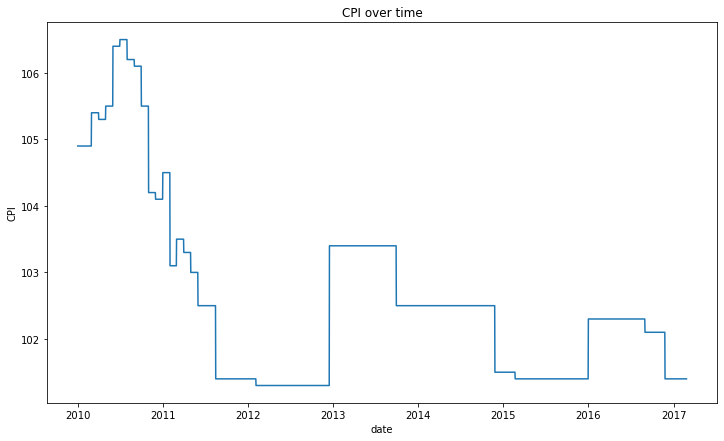

In [23]:
# We want to prepare our exogenous data much like our sales data. Let's try the CCI for starters.

# Make sales dataframe

CPI = df[['datetime', 'Consumer Price Index (CPI)']]
CPI = CPI.rename(columns={'datetime': 'date', 'Consumer Price Index (CPI)':'CPI'})
CPI = CPI.set_index('date')

fig, ax = plt.subplots(figsize=(12,7))
# plt.plot(sales['SALES ($)'])

sns.lineplot(data=CPI, x='date', y='CPI')
ax.set_title('CPI over time')


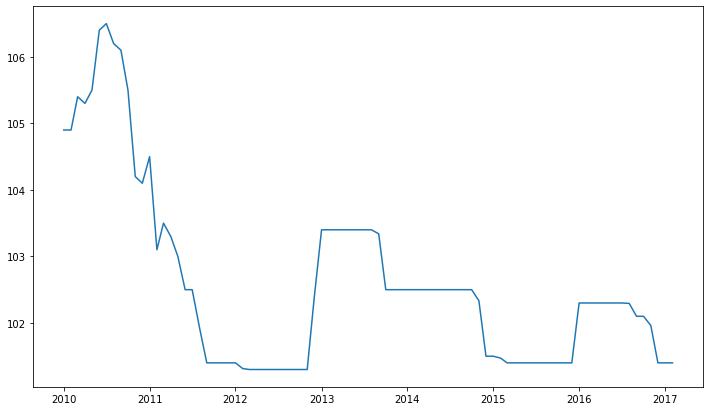

In [24]:
z = CPI['CPI'].resample('MS').mean()

plt.plot(z)

In [25]:
mod = sm.tsa.statespace.SARIMAX(y, exog = z,
                                order=(0, 1, 0),
                                seasonal_order=(0, 2, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                         sales   No. Observations:                   86
Model:             SARIMAX(0, 1, 0)x(0, 2, [1, 2, 3, 4], 12)   Log Likelihood                -168.863
Date:                                       Tue, 16 Nov 2021   AIC                            349.726
Time:                                               14:19:52   BIC                            352.635
Sample:                                           01-01-2010   HQIC                           348.649
                                                - 02-01-2017                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPI         3756.3222   3.

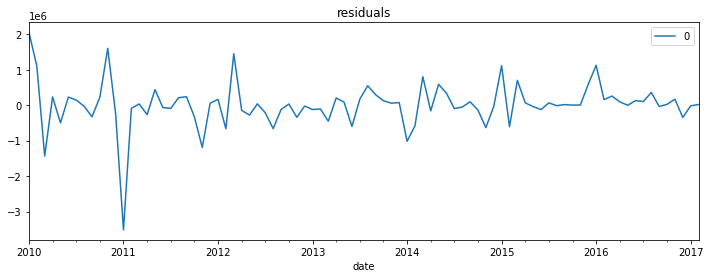

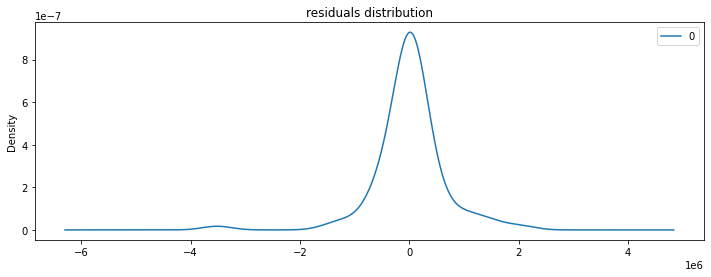

                  0
count  8.600000e+01
mean   9.815931e+03
std    6.540298e+05
min   -3.516045e+06
25%   -1.439129e+05
50%    1.724602e+04
75%    1.945431e+05
max    2.054572e+06


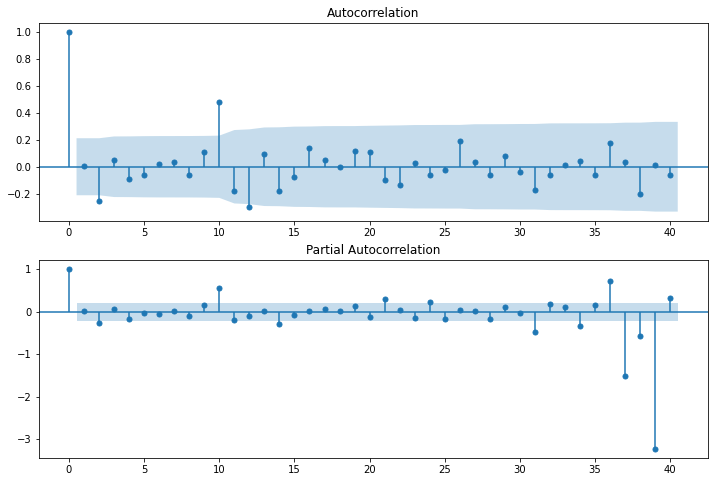

In [26]:
# line plot of residuals
residuals = pd.DataFrame(results.resid)
residuals.plot(title='residuals', figsize=(12, 4))
plt.show()
# density plot of residuals
residuals.plot(kind='kde', title='residuals distribution', figsize=(12, 4))
plt.show()
# summary stats of residuals
print(residuals.describe())

# Look at the ACF and PACF as well
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)